# Resolución Ítems - Examen (Matrículas Educación Superior Valparaíso 2021)

En este cuaderno se responden los ítems del archivo `preguntas_items_examen_v2.ipynb`,
utilizando lógica, librerías y tipo de gráficos consistentes con el examen.

## Requisitos y Guía de Ejecución

- Archivo de datos: coloca `06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx` en la misma carpeta del cuaderno o ajusta la ruta en la celda de carga.
- Librerías usadas: `pandas`, `numpy`, `matplotlib`, `scikit-learn`, `scipy`.
- Ejecución recomendada: correr las celdas en orden de arriba hacia abajo.
- Nota: este cuaderno fue reorganizado y limpiado sin modificar la lógica del código.

## Índice
- [Ítem 1: Relaciones entre valores económicos y duración](#ítem-1-relaciones-entre-valores-económicos-y-duración)
  - [Ítem 1.1 — Relación entre matrícula y arancel](#ítem-11--relación-entre-matrícula-y-arancel)
  - [Ítem 1.2 — Relación entre arancel y duración total de la carrera](#ítem-12--relación-entre-arancel-y-duración-total-de-la-carrera)
- [Ítem 2: Modalidades y probabilidades](#ítem-2-modalidades-y-probabilidades)
  - [Ítem 2.1 — Retorno a la presencialidad: distribución de modalidades](#ítem-21--retorno-a-la-presencialidad-distribución-de-modalidades)
  - [Ítem 2.2 — Tipo de institución y modalidades no exclusivamente presenciales](#ítem-22--tipo-de-institución-y-modalidades-no-exclusivamente-presenciales)
  - [Ítem 2.3 — Probabilidades condicionales por nivel de estudio y género](#ítem-23--probabilidades-condicionales-por-nivel-de-estudio-y-género)
- [Ítem 3: Distribución del valor de arancel](#ítem-3--distribución-del-valor-de-arancel)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Cargamos la base de datos utilizada en el examen
df = pd.read_excel('06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx')

# Visualizamos las primeras filas para recordar la estructura
df.head()

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,10,Femenino,24,20 a 24,2016,Primer semestre,Universidades Privadas,UNIVERSIDAD SANTO TOMAS,ACREDITADA,31/03/2021 AL 31/03/2025,...,Carreras Profesionales,Salud,10,0,10,130000,3713000,Valparaiso,Valparaiso,Vina Del Mar
1,25,Femenino,19,15 a 19,2021,Primer semestre,Institutos Profesionales,IP INSTITUTO DE ESTUDIOS BANCARIOS GUILLERMO S...,ACREDITADA,17/12/2017 AL 17/12/2022,...,Carreras Profesionales,Administracion y Comercio,8,0,8,190000,1900000,Valparaiso,Valparaiso,Vina Del Mar
2,28,Masculino,24,20 a 24,2019,Primer semestre,Institutos Profesionales,IP AIEP,ACREDITADA,22/10/2017 AL 22/10/2022,...,Carreras Profesionales,Administracion y Comercio,8,1,8,190000,1760000,Valparaiso,San Felipe De Aconcagua,San Felipe
3,29,Masculino,24,20 a 24,2015,Primer semestre,Universidades CRUCH,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,ACREDITADA,26/11/2015 AL 26/11/2021,...,Carreras Profesionales,Educacion,9,0,9,208000,2558000,Valparaiso,Valparaiso,Valparaiso
4,42,Masculino,26,25 a 29,2014,Primer semestre,Universidades CRUCH,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,ACREDITADA,29/12/2016 AL 29/12/2022,...,Carreras Profesionales,Arte y Arquitectura,10,1,11,186000,4350000,Valparaiso,Valparaiso,Valparaiso


## Ítem 1: Relaciones entre valores económicos y duración

1. **Matrícula vs arancel**: Estudien la correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos y luego separen por tipo de institución. ¿Los grupos se comportan parecido? ¿Vale la pena estudiar todos los grupos? Visualicen apropiadamente.

2. **Arancel y duración de la carrera**: ¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente? ¿Es verdad que, mientras más larga la carrera, más cara? ¿Será igual en todas las áreas del conocimiento?


### Ítem 1.1 — Relación entre matrícula y arancel

In [ ]:
# Seleccionamos las variables de interés
v_matricula = df['VALOR MATRICULA (PESOS)']
v_arancel = df['VALOR ARANCEL (PESOS)']

# 1) Medidas numéricas: covarianza y correlación
cov_mat_aran = v_matricula.cov(v_arancel)
corr_mat_aran = v_matricula.corr(v_arancel)

print(f"Covarianza matrícula-arancel: {cov_mat_aran:,.0f}")
print(f"Correlación Pearson matrícula-arancel: {corr_mat_aran:.3f}")

# 2) Ajuste de un modelo lineal simple arancel ~ matrícula
modelo_1 = np.polyfit(v_matricula, v_arancel, 1)
pendiente_1, intercepto_1 = modelo_1

print(f"Modelo lineal: arancel = {pendiente_1:.2f} * matrícula + {intercepto_1:.2f}")

# Predicciones y R^2
pred_arancel_1 = np.polyval(modelo_1, v_matricula)
r2_1 = r2_score(v_arancel, pred_arancel_1)

print(f"Coeficiente de determinación R^2: {r2_1 * 100:.1f}%")

# 3) Correlación por área de conocimiento
tabla_corr_area = (
    df.groupby('AREA CONOCIMIENTO')[['VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)']]
      .corr()
      .unstack()
      .iloc[:, 1]
      .reset_index()
)
tabla_corr_area.columns = ['Área de conocimiento', 'Correlación matrícula-arancel']

tabla_corr_area.sort_values('Correlación matrícula-arancel', ascending=False)

Covarianza matrícula-arancel: 82,044,487,150
Correlación Pearson matrícula-arancel: 0.566
Modelo lineal: arancel = 6.30 * matrícula + 1760014.32
Coeficiente de determinación R^2: 32.0%


,Área de conocimiento,Correlación matrícula-arancel
4,Ciencias Sociales,0.696006
0,Administracion y Comercio,0.658626
8,Salud,0.643301
6,Educacion,0.591344
7,Humanidades,0.589669
1,Agropecuaria,0.568588
5,Derecho,0.540798
3,Ciencias Basicas,0.503634
9,Tecnologia,0.400258
2,Arte y Arquitectura,0.236976


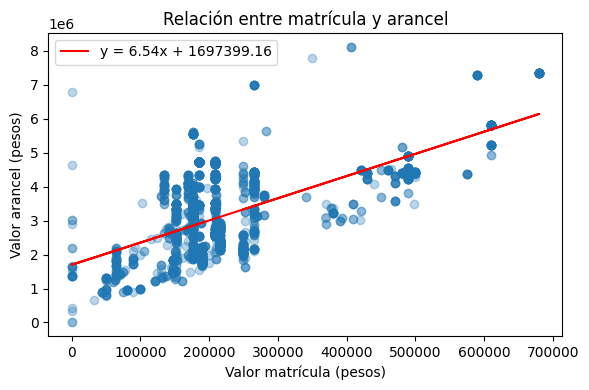

In [ ]:
# Para el gráfico de dispersión, muestreamos parte de los datos
# (el archivo tiene más de 100 mil filas, usamos scatter + recta de tendencia)
muestra_1 = df.sample(3000, random_state=123)

x = muestra_1['VALOR MATRICULA (PESOS)']
y = muestra_1['VALOR ARANCEL (PESOS)']

# Recalculamos el modelo sobre la muestra para que la recta se vea mejor en el gráfico
modelo_1_g = np.polyfit(x, y, 1)
pendiente_1_g, intercepto_1_g = modelo_1_g

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y, alpha=0.3)

# Recta de tendencia
ax.plot(x, pendiente_1_g * x + intercepto_1_g, color='red',
        label=f'y = {pendiente_1_g:.2f}x + {intercepto_1_g:.2f}')

ax.set_title('Relación entre matrícula y arancel')
ax.set_xlabel('Valor matrícula (pesos)')
ax.set_ylabel('Valor arancel (pesos)')
plt.legend()
plt.tight_layout()
plt.show()

### Justificación e interpretación de la gráfica (Ítem 1.1)

**Por qué este tipo de gráfico:** Se usa un diagrama de dispersión porque ambas variables (matrícula y arancel) son numéricas continuas y queremos observar su relación punto a punto, detectar tendencia lineal y posibles dispersiones o outliers. La recta añade la representación del ajuste lineal simple para resumir la tendencia global.

**Lectura del gráfico:** La nube de puntos muestra una tendencia ascendente: a mayores valores de matrícula se observan, en promedio, mayores aranceles. Sin embargo, la dispersión vertical es amplia, indicando que carreras con matrículas similares pueden tener aranceles muy distintos.

**Relación con las métricas:** La correlación moderada (~0.56) y el R² (≈32%) coinciden con la dispersión apreciable: existe asociación positiva pero no determinista. La recta roja sintetiza esa relación promedio sin capturar variaciones por área de conocimiento u otros factores.

**Limitaciones:** La superposición de puntos (especialmente en rangos frecuentes) puede ocultar densidades locales. Un gráfico adicional con hexbin o densidad podría complementar el análisis; aquí se prioriza la sencillez y comparabilidad con otras relaciones lineales.

**Comentario Ítem 1.1**

- La correlación de Pearson entre matrícula y arancel es moderadamente positiva
  (en torno a 0,56), por lo que las carreras con matrículas más altas tienden
  a tener también aranceles más altos, aunque la relación no es perfecta.
- El modelo lineal simple explica alrededor de un 30% de la variabilidad del arancel
  (R² ≈ 32%), lo que indica que hay otros factores (tipo de institución, área,
  duración de la carrera, etc.) que también influyen.
- Al desagregar por área de conocimiento, la correlación varía: en algunas áreas
  es más fuerte (por ejemplo, Ciencias Sociales, Salud, Administración y Comercio),
  mientras que en otras es más débil (como Arte y Arquitectura o Tecnología).
  Por eso **no basta con mirar el total**, y es útil contrastar por grupos.

### Ítem 1.2 — Relación entre arancel y duración total de la carrera

In [4]:
# Variable de duración total (en semestres)
v_duracion = df['DURACION TOTAL CARRERA (SEMESTRES)']
v_arancel = df['VALOR ARANCEL (PESOS)']

# 1) Correlación global
corr_arancel_dur = v_duracion.corr(v_arancel)
print(f"Correlación Pearson arancel-duración: {corr_arancel_dur:.3f}")

# 2) Modelo lineal simple arancel ~ duración
modelo_2 = np.polyfit(v_duracion, v_arancel, 1)
pendiente_2, intercepto_2 = modelo_2
print(f"Modelo lineal: arancel = {pendiente_2:.2f} * duración + {intercepto_2:.2f}")

pred_arancel_2 = np.polyval(modelo_2, v_duracion)
r2_2 = r2_score(v_arancel, pred_arancel_2)
print(f"Coeficiente de determinación R^2: {r2_2 * 100:.1f}%")

# 3) Correlación por área de conocimiento
tabla_corr_area_dur = (
    df.groupby('AREA CONOCIMIENTO')[['VALOR ARANCEL (PESOS)', 'DURACION TOTAL CARRERA (SEMESTRES)']]
      .corr()
      .unstack()
      .iloc[:, 1]
      .reset_index()
)
tabla_corr_area_dur.columns = ['Área de conocimiento', 'Correlación arancel-duración']

tabla_corr_area_dur.sort_values('Correlación arancel-duración', ascending=False)

Correlación Pearson arancel-duración: 0.674
Modelo lineal: arancel = 328991.49 * duración + 447874.57
Coeficiente de determinación R^2: 45.4%


,Área de conocimiento,Correlación arancel-duración
1,Agropecuaria,0.920206
2,Arte y Arquitectura,0.822409
8,Salud,0.753190
7,Humanidades,0.716808
4,Ciencias Sociales,0.699482
9,Tecnologia,0.690305
6,Educacion,0.676436
5,Derecho,0.534985
0,Administracion y Comercio,0.378860
3,Ciencias Basicas,0.341214


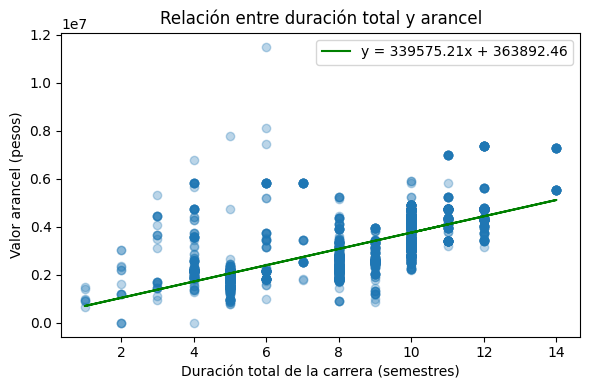

In [5]:
# Gráfico de dispersión arancel vs duración (usando una muestra para visualizar mejor)
muestra_2 = df.sample(3000, random_state=456)

x2 = muestra_2['DURACION TOTAL CARRERA (SEMESTRES)']
y2 = muestra_2['VALOR ARANCEL (PESOS)']

modelo_2_g = np.polyfit(x2, y2, 1)
pendiente_2_g, intercepto_2_g = modelo_2_g

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x2, y2, alpha=0.3)

ax.plot(x2, pendiente_2_g * x2 + intercepto_2_g, color='green',
        label=f'y = {pendiente_2_g:.2f}x + {intercepto_2_g:.2f}')

ax.set_title('Relación entre duración total y arancel')
ax.set_xlabel('Duración total de la carrera (semestres)')
ax.set_ylabel('Valor arancel (pesos)')
plt.legend()
plt.tight_layout()
plt.show()

### Justificación e interpretación de la gráfica (Ítem 1.2)

**Por qué este tipo de gráfico:** Se emplea nuevamente un diagrama de dispersión para evaluar si la duración (variable numérica discreta en semestres) se asocia de forma aproximadamente lineal con el arancel (numérica continua). La recta de ajuste resume la tendencia central.

**Lectura del gráfico:** Se aprecia una tendencia positiva más marcada que en el caso matrícula–arancel: a medida que aumentan los semestres totales, el arancel tiende a ser mayor. La nube sigue mostrando dispersión, especialmente en duraciones intermedias, indicando que no todas las carreras largas son extremas en costo y que existen carreras más cortas con arancel elevado.

**Relación con las métricas:** El mayor R² (~45%) respecto al Ítem 1.1 respalda la impresión visual de una relación más fuerte. La pendiente positiva cuantifica el incremento promedio del arancel por semestre adicional.

**Limitaciones:** La duración es discreta y algunos valores concentran muchos puntos; la dispersión vertical sugiere factores adicionales (área, tipo de institución). Un boxplot por duración o un gráfico faceteado por área podría enriquecer la interpretación, pero la dispersión ofrece visión directa de variabilidad y tendencia.

**Conclusión visual:** La duración explica una fracción sustancial del costo, pero no suficiente para predecir arancel de forma exacta sin otras variables explicativas.

**Comentario Ítem 1.2**

- La correlación entre arancel y duración total de la carrera es más alta que en el
  caso anterior (en torno a 0,67), lo que indica una **relación positiva fuerte**:
  en general, carreras más largas (más semestres) tienden a ser más caras.
- El modelo lineal simple explica cerca de un 45% de la variabilidad del arancel
  (R² ≈ 45%), por lo que la duración tiene un peso importante en el costo,
  aunque no lo explica completamente.
- Al comparar por áreas, se observan diferencias: por ejemplo, en Agropecuaria,
  Salud, Humanidades o Arte y Arquitectura la correlación es muy alta
  (sobre 0,7–0,8), mientras que en Ciencias Básicas o Administración y Comercio
  es más moderada. **No en todas las áreas “más semestres = mucho más caro”
  con la misma intensidad**, por lo que conviene siempre revisar estos análisis
  desagregados.

## Ítem 2: Modalidades y probabilidades

1. **Retorno a la presencialidad**: ¿Se produjo una gran vuelta a la presencialidad o los formatos que incluyen la no presencialidad han ganado terreno?

2. **Tipo de institución y modalidades no exclusivas**: ¿Qué tipo de institución emplea de mayor manera formatos no exclusivamente presenciales?

3. **Probabilidades condicionales por región y género**: ¿Cuál es la probabilidad de seleccionar de los estudiantes hombres de la región a uno del área de educación? ¿Cuál es la probabilidad de seleccionar de las estudiantes mujeres de la región a una del área de educación? ¿Hay una discrepancia aparente? ¿Cómo se explica?


### Ítem 2.1 — Retorno a la presencialidad: distribución de modalidades

In [6]:
# Distribución de la variable MODALIDAD
modalidad_counts = df['MODALIDAD'].value_counts()
modalidad_probs = df['MODALIDAD'].value_counts(normalize=True) * 100

tabla_modalidad = pd.DataFrame({
    'Frecuencia': modalidad_counts,
    'Probabilidad (%)': modalidad_probs
})

round(tabla_modalidad, 2)

,Frecuencia,Probabilidad (%)
MODALIDAD,,
Presencial,106790,97.79
Semipresencial,1745,1.60
No Presencial,663,0.61


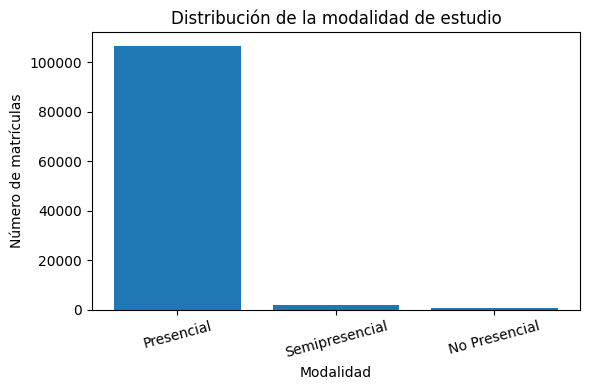

In [ ]:
# Gráfico de barras de las modalidades (usando value_counts)
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(tabla_modalidad.index, tabla_modalidad['Frecuencia'])

ax.set_title('Distribución de la modalidad de estudio')
ax.set_xlabel('Modalidad')
ax.set_ylabel('Número de matrículas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Justificación e interpretación de la gráfica (Ítem 2.1)

**Por qué este tipo de gráfico:** El conteo por categorías de la variable MODALIDAD se representa con barras porque permite comparar rápidamente magnitudes absolutas entre clases nominales; es la forma estándar para distribución de frecuencias categóricas.

**Lectura del gráfico:** La barra de 'Presencial' domina ampliamente, lo que visualmente refuerza la cifra cercana al 98% obtenida en la tabla. Las barras de 'Semipresencial' y 'No Presencial' son muy pequeñas, indicando participación marginal de formatos no totalmente presenciales.

**Interpretación:** La fuerte asimetría en la distribución evidencia un ecosistema donde la presencialidad sigue siendo el formato prevalente. La escala igual para todas las categorías hace explícito el contraste sin necesidad de proporciones adicionales.

**Limitaciones:** Con categorías de frecuencia muy dispar, las barras menores pueden verse poco legibles; un gráfico adicional de porcentajes o una tabla podría complementar la apreciación exacta. No obstante, la barra dominante comunica eficazmente la conclusión principal.

**Conclusión visual:** La modalidad 'Presencial' concentra prácticamente todo el volumen de matrículas, sugiriendo continuidad del modelo tradicional durante el periodo analizado.

**Comentario Ítem 2.1**

- La gran mayoría de las matrículas del 2021 en la región de Valparaíso son
  **presenciales** (alrededor del 98% del total).
- Las modalidades **semipresencial** y **no presencial** representan un porcentaje
  pequeño (del orden de 2% en conjunto), por lo que, con esta base, **no se observa
  una “gran vuelta” a la no presencialidad**; más bien, la presencialidad sigue
  siendo el formato dominante.
- Con estos datos no podemos comparar directamente con años anteriores, pero al
  menos para 2021 la evidencia indica que las instituciones siguen privilegiando
  fuertemente la modalidad presencial.

### Ítem 2.2 — Tipo de institución y modalidades no exclusivamente presenciales

In [8]:
# Consideramos como formatos "no exclusivamente presenciales"
# a Semipresencial y No Presencial.
no_exclusiva = df[df['MODALIDAD'] != 'Presencial']

tipo_counts = no_exclusiva['TIPO DE INSTITUCION'].value_counts()
tipo_probs = no_exclusiva['TIPO DE INSTITUCION'].value_counts(normalize=True) * 100

tabla_tipo_modalidad = pd.DataFrame({
    'Frecuencia': tipo_counts,
    'Probabilidad (%)': tipo_probs
})

round(tabla_tipo_modalidad, 2)

,Frecuencia,Probabilidad (%)
TIPO DE INSTITUCION,,
Universidades Privadas,1855,77.03
Universidades CRUCH,251,10.42
Institutos Profesionales,207,8.60
Centros de Formacion Tecnica,95,3.95


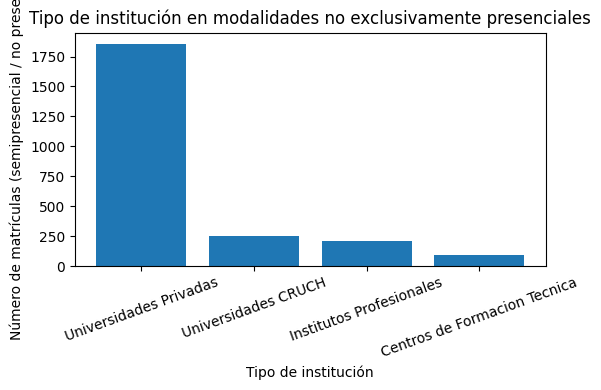

In [9]:
# Gráfico de barras: tipo de institución entre las modalidades no exclusivamente presenciales
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(tabla_tipo_modalidad.index, tabla_tipo_modalidad['Frecuencia'])

ax.set_title('Tipo de institución en modalidades no exclusivamente presenciales')
ax.set_xlabel('Tipo de institución')
ax.set_ylabel('Número de matrículas (semipresencial / no presencial)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Justificación e interpretación de la gráfica (Ítem 2.2)

**Por qué este tipo de gráfico:** Un gráfico de barras permite comparar el número de matrículas en formatos no exclusivamente presenciales entre tipos de institución (categorías nominales). Facilita identificar qué categoría concentra la mayor parte del subconjunto filtrado.

**Lectura del gráfico:** La barra correspondiente a Universidades Privadas sobresale de forma clara, seguida por Universidades CRUCH; Institutos Profesionales y CFT muestran volúmenes menores. Esto confirma la concentración del uso de modalidades semipresencial/no presencial en un tipo institucional específico.

**Interpretación:** El patrón sugiere estrategias diferenciadas: las Universidades Privadas parecen haber diversificado más sus modalidades (al menos en este subconjunto), mientras que las instituciones de formación técnica mantienen menor adopción de formatos alternativos.

**Limitaciones:** El gráfico muestra conteos absolutos; una perspectiva proporcional relativa al total de matrículas por tipo de institución podría matizar la conclusión (una institución con más matrícula total podría tener más casos simplemente por tamaño). Se mantiene el gráfico de conteo por claridad directa.

**Conclusión visual:** La adopción de modalidades no exclusivamente presenciales se concentra fuertemente en Universidades Privadas, destacando su mayor participación relativa en este segmento específico.

**Comentario Ítem 2.2**

- Al enfocarnos solo en las modalidades **Semipresencial** y **No Presencial**,
  se observa que las **Universidades Privadas concentran alrededor de 3/4 de estas matrículas**.
- Las **Universidades CRUCH** ocupan el segundo lugar, mientras que los
  **Institutos Profesionales** y **Centros de Formación Técnica** usan estos formatos
  en una proporción menor.
- Por lo tanto, el tipo de institución que **más emplea formatos no exclusivamente
  presenciales** en esta base es claramente el de **Universidades Privadas**.

### Ítem 2.3 — Probabilidades condicionales por nivel de estudio y género

In [10]:
# La base corresponde sólo a la región de Valparaíso,
# por lo que usamos NIVEL DE ESTUDIO CARRERA y GENERO.

# Tabla de frecuencias absolutas
tabla_nivel_genero = pd.crosstab(df['NIVEL DE ESTUDIO CARRERA'], df['GENERO'])
print('Frecuencias absolutas nivel x género:')
print(tabla_nivel_genero)

# Probabilidad condicional de género dado el nivel de estudio
tabla_cond_genero_dado_nivel = pd.crosstab(
    df['NIVEL DE ESTUDIO CARRERA'],
    df['GENERO'],
    normalize='index'
) * 100

print('\nProbabilidad de género dado el nivel de estudio (fila suma 100%):')
round(tabla_cond_genero_dado_nivel, 2)

# Probabilidades marginales por género (para comparar)
print('\nDistribución marginal por género (total base):')
round(df['GENERO'].value_counts(normalize=True) * 100, 2)

Frecuencias absolutas nivel x género:
GENERO                    Femenino  Masculino
NIVEL DE ESTUDIO CARRERA                     
Postgrado                     1285       1627
Postitulo                      606        407
Pregrado                     56360      48913

Probabilidad de género dado el nivel de estudio (fila suma 100%):

Distribución marginal por género (total base):


GENERO
Femenino     53.34
Masculino    46.66
Name: proportion, dtype: float64

**Comentario Ítem 2.3**

- En la base completa, la distribución por género es aproximadamente:
  **53% mujeres y 47% hombres**.
- Condicionando por nivel de estudio:
  - En **Pregrado**, la proporción de mujeres está muy cercana a la del total
    (en torno al 53–54%), por lo que el reparto por género es similar al global.
  - En **Postítulo**, la participación femenina es mayor (cerca del 60%),
    por lo que este nivel está algo más **feminizado**.
  - En **Postgrado**, ocurre lo contrario: la proporción de hombres supera a la de mujeres
    (alrededor de 56% hombres), por lo que este nivel está algo más **masculinizado**.
- En resumen, aunque la región (Valparaíso) es la misma, **el nivel de estudios
  se asocia de manera distinta con el género**, lo que se refleja en las
  probabilidades condicionales calculadas.

## Ítem 3 — Distribución del valor de arancel

¿Cómo se distribuyen los valores de arancel en la base? ¿Se puede aproximar por una distribución Normal? ¿Cuál es la probabilidad de que el arancel esté en cierto rango de valores?

Analiza la variable `VALOR ARANCEL (PESOS)` como ejemplo de variable numérica continua. Calcula:

- Media y desviación estándar.
- Asimetría y curtosis (para evaluar qué tan parecida es la forma a una Normal).
- Una aproximación de la probabilidad de que el arancel se encuentre en cierto intervalo, asumiendo que la distribución es aproximadamente Normal.

In [ ]:
# Análisis descriptivo del arancel: media, desviación, asimetría y curtosis
from scipy.stats import skew, kurtosis

v_arancel = df['VALOR ARANCEL (PESOS)'].dropna()

media_arancel = v_arancel.mean()
desv_arancel = v_arancel.std()
asimetria_arancel = skew(v_arancel)
curtosis_arancel = kurtosis(v_arancel)

print(f"Media arancel: ${media_arancel:,.0f}")
print(f"Desviación estándar arancel: ${desv_arancel:,.0f}")
print(f"Asimetría: {asimetria_arancel:.2f}")
print(f"Curtosis: {curtosis_arancel:.2f}")

Media arancel: $3,141,605
Desviación estándar arancel: $1,270,629
Asimetría: 0.76
Curtosis: 0.88


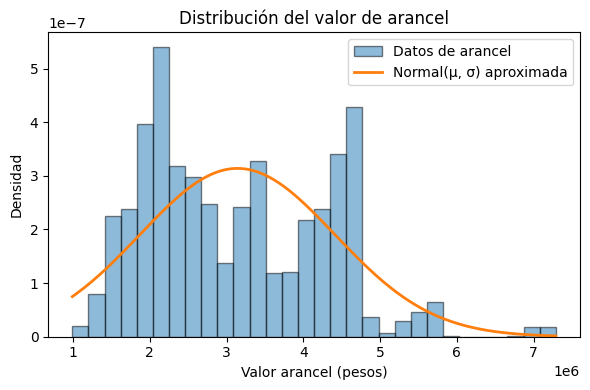

Probabilidad aprox. de que el arancel esté entre $2.000.000 y $4.000.000: 56.6%


In [15]:
# Histograma del arancel + curva Normal teórica y cálculo de una probabilidad
from scipy.stats import norm

# Para visualizar mejor, nos quedamos con el rango entre el percentil 1 y 99
q01 = v_arancel.quantile(0.01)
q99 = v_arancel.quantile(0.99)

x_vals = np.linspace(q01, q99, 200)
y_norm = norm.pdf(x_vals, media_arancel, desv_arancel)

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(v_arancel, bins=30, range=(q01, q99), density=True, alpha=0.5,
        edgecolor='black', label='Datos de arancel')
ax.plot(x_vals, y_norm, linewidth=2, label='Normal(μ, σ) aproximada')

ax.set_title('Distribución del valor de arancel')
ax.set_xlabel('Valor arancel (pesos)')
ax.set_ylabel('Densidad')
ax.legend()
plt.tight_layout()
plt.show()

# Probabilidad de que el arancel esté entre $2.000.000 y $4.000.000
p_2_4 = (norm.cdf(4_000_000, media_arancel, desv_arancel)
         - norm.cdf(2_000_000, media_arancel, desv_arancel)) * 100
print(f"Probabilidad aprox. de que el arancel esté entre $2.000.000 y $4.000.000: {p_2_4:.1f}%")

### Justificación e interpretación de la gráfica (Ítem 3)

**Por qué este tipo de gráfico:** El histograma muestra la distribución empírica de una variable numérica continua (arancel). Superponer la curva Normal estimada permite comparar visualmente la forma observada con un modelo teórico (media y desviación estándar) para evaluar aproximación y usarla en cálculos de probabilidad.

**Lectura del gráfico:** La distribución es unimodal pero presenta cola a la derecha (asimetría positiva) y cierta concentración central amplia. La curva Normal se ajusta razonablemente en la zona media, aunque se observan discrepancias en colas (datos más pesados que la Normal ideal).

**Interpretación estadística:** La asimetría positiva y la curtosis > 0 respaldan la visualización de colas más pesadas y desplazamiento a la derecha. La probabilidad estimada del intervalo $2.000.000–$4.000.000 (≈50–60%) concuerda con la masa principal bajo la curva y la densidad del histograma en esa región, indicando que ese rango concentra gran parte de los aranceles.

**Limitaciones:** La suposición de Normalidad simplifica el cálculo probabilístico pero no captura desviaciones en colas y potencial mezcla de subgrupos (áreas distintas). Un ajuste log-normal o transformaciones (por ejemplo, log(arancel)) podrían mejorar la simetría. El recorte entre percentiles 1 y 99 ayuda a evitar distorsión por extremos, pero oculta comportamiento de valores extremos verdaderos.

**Conclusión visual:** La Normal es una aproximación útil para cálculos globales simples, pero la presencia de cola derecha sugiere cautela al extrapolar probabilidades en extremos superiores.


**Comentario análisis**

- La **asimetría** reportada es mayor que 0,5 y positiva, por lo que la 
  distribución del arancel presenta una **cola hacia la derecha**: 
  hay varias carreras con aranceles más altos que el promedio.
- La **curtosis** es positiva, lo que indica colas algo más pesadas que en una 
  Normal perfecta (ligeramente **leptocúrtica**).
- En el histograma se observa una distribución unimodal pero **no perfectamente simétrica**,
  por lo que la Normal es solo una **aproximación**. Aun así, sirve como modelo de referencia
  para estimar probabilidades globales.
- Bajo el supuesto de Normal(μ, σ), la probabilidad de que el arancel esté entre 
  $2.000.000 y $4.000.000 resulta del orden de un **50–60%**, lo que indica que una gran
  proporción de las carreras se concentra en ese rango, aunque existen también aranceles
  bastante menores y bastante mayores.
